In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
critical_mineral = pd.read_csv(r'C:\Users\Faisal Askari\Downloads\ofr20051294-csv\ofr20051294/deposit.csv')
gdp_ranked_2021 =  pd.read_csv(r'C:\Users\Faisal Askari\Downloads\gdp_ppp_ranked_2021.csv')
country_area = pd.read_csv(r'C:\Users\Faisal Askari\Downloads\country_area_sqfeet.csv')
df_avg_gdp = pd.read_csv(r'C:\Users\Faisal Askari\Downloads\average_gdp-ppp.csv')
df_area_sqft = pd.read_csv(r'C:\Users\Faisal Askari\Downloads\country_area_sqfeet.csv')
critical_mineral.info()
gdp_ranked_2021.info()
country_area.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3168 entries, 0 to 3167
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   gid          3168 non-null   int64  
 1   dep_name     3168 non-null   object 
 2   country      3168 non-null   object 
 3   state        382 non-null    object 
 4   latitude     3161 non-null   float64
 5   longitude    3161 non-null   float64
 6   commodity    3168 non-null   object 
 7   dep_type     3168 non-null   object 
 8   type_detail  379 non-null    object 
 9   model_code   372 non-null    object 
 10  model_name   376 non-null    object 
 11  metallic     796 non-null    object 
 12  citation     1272 non-null   object 
dtypes: float64(2), int64(1), object(10)
memory usage: 321.9+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 198 entries, 0 to 197
Data columns (total 3 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------            

Number of unique commodities: 580
There are 580 unique commodities. Plotting all with distinct colors might be difficult to interpret.
Showing a general distribution. You can request specific commodities later.


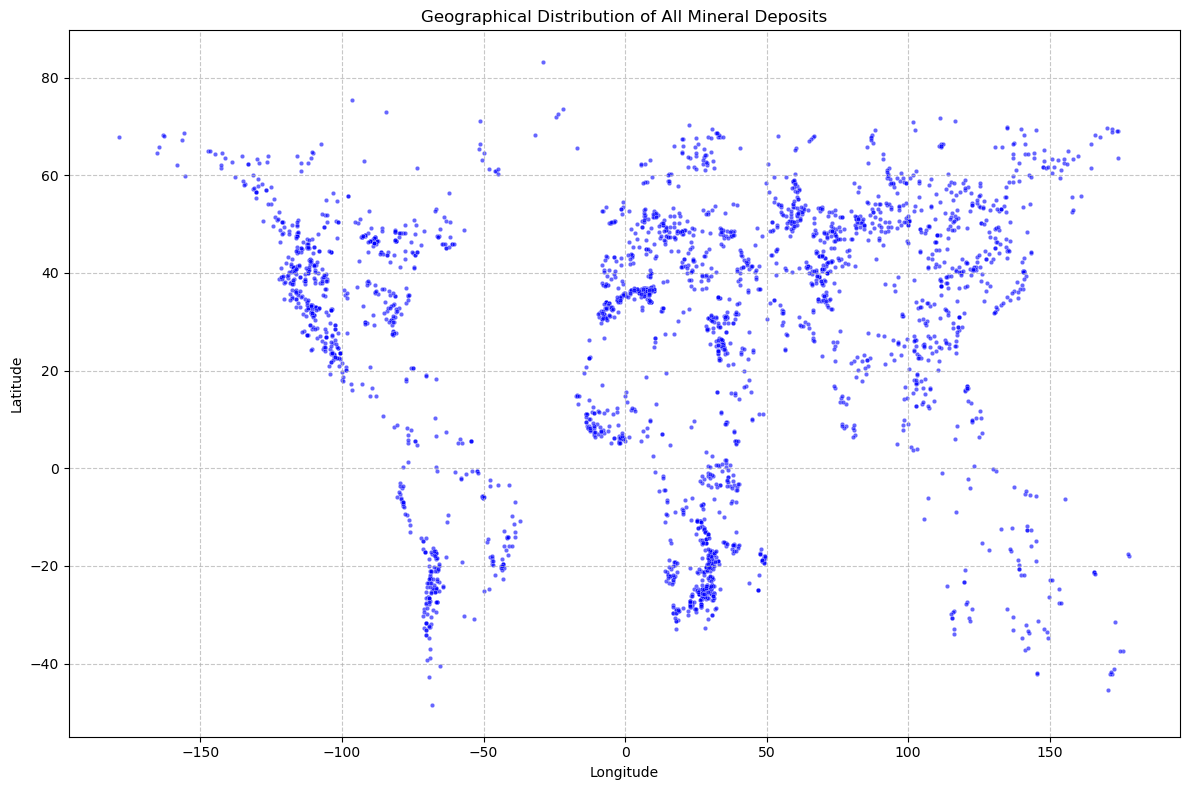

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Drop rows where latitude or longitude are missing, as they are essential for plotting
df_cleaned = critical_mineral.dropna(subset=['latitude', 'longitude'])

# Get the number of unique commodities
num_commodities = df_cleaned['commodity'].nunique()
print(f"Number of unique commodities: {num_commodities}")

# Check if there are too many unique commodities for distinct colors
# If there are too many unique commodities, plotting all with distinct colors can be overwhelming
if num_commodities > 50: # Arbitrary threshold, can be adjusted
    print(f"There are {num_commodities} unique commodities. Plotting all with distinct colors might be difficult to interpret.")
    print("Showing a general distribution. You can request specific commodities later.")
    
    plt.figure(figsize=(12, 8))
    sns.scatterplot(
        data=df_cleaned,
        x='longitude',
        y='latitude',
        s=10, # Smaller points for better visibility with many points
        alpha=0.6, # Transparency to see overlapping points
        color='blue' # Single color for general distribution
    )
    plt.title('Geographical Distribution of All Mineral Deposits')
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.savefig('all_deposits_geographical_distribution.png')
    plt.show()

else:
    # Use seaborn for a scatter plot with different colors for each commodity
    plt.figure(figsize=(14, 10))
    sns.scatterplot(
        data=df_cleaned,
        x='longitude',
        y='latitude',
        hue='commodity',
        palette='tab20', # Use a palette that offers many distinct colors
        s=50,
        alpha=0.7,
        legend='full'
    )
    plt.title('Geographical Distribution of Mineral Deposits by Commodity')
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
    plt.tight_layout()
    plt.savefig('deposits_by_commodity_geographical_distribution.png')
    plt.show()

Top 20 most frequent commodities:
 commodity
Gold                 243
Copper               235
Iron                 208
Chromium              84
Phosphate             77
Aluminum              73
Halite                62
Lead                  61
Diamond               52
Tungsten              49
Manganese             46
Zinc                  46
Tin                   42
Graphite              42
phosphate rock        39
gold, silver          35
Asbestos              35
iron                  33
Gold, PGE, Silver     32
Copper, gold          29
Name: count, dtype: int64

Number of deposits per commodity group:
 commodity_group
Critical Minerals/Tech Metals    1524
Industrial Minerals               623
Precious Metals                   455
Other/Unclassified                413
Base Metals                       136
Energy Minerals                    10
Name: count, dtype: int64


C:\Users\Faisal Askari\AppData\Local\Temp\ipykernel_12060\3621307816.py:44: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['commodity_group'] = df_cleaned['commodity'].apply(assign_commodity_group)


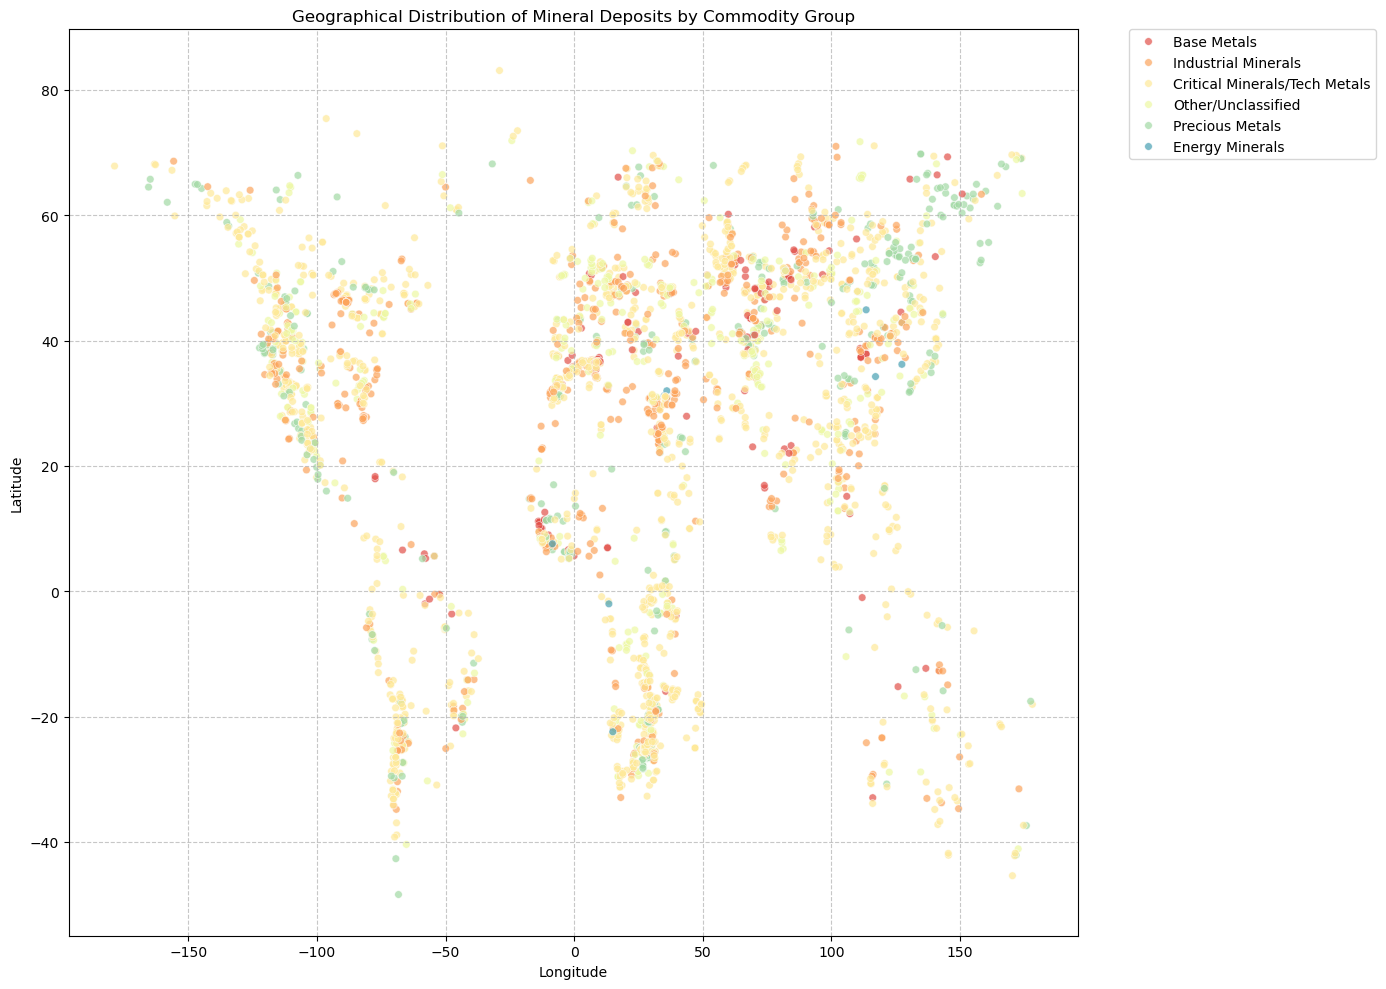

In [3]:
# --- Step 1: Inspect and Define Commodity Groups ---
# Let's inspect the top occurring commodities to get an idea for grouping
top_commodities = df_cleaned['commodity'].value_counts().head(20)
print("Top 20 most frequent commodities:\n", top_commodities)

# Define a simple grouping strategy for demonstration based on common critical minerals and types
# This list can be expanded or refined based on specific critical mineral definitions (e.g., USGS list)
critical_minerals = [
    'RARE EARTH ELEMENTS', 'LITHIUM', 'COBALT', 'GRAPHITE', 'NICKEL',
    'PLATINUM GROUP ELEMENTS', 'VANADIUM', 'TITANIUM', 'TUNGSTEN', 'MANGANESE',
    'ANTIMONY', 'BERYLLIUM', 'BISMUTH', 'FLUORSPAR', 'GALLIUM', 'GERMANIUM',
    'HAFNIUM', 'INDIUM', 'MAGNESIUM', 'NIOBIUM', 'POTASH', 'RHENIUM',
    'STRONTIUM', 'TANTALUM', 'TELLURIUM', 'TIN', 'ZIRCONIUM', 'BAUXITE',
    'CHROMIUM', 'ZINC', 'COPPER' # Some commonly considered critical, or important for green tech
]

precious_metals = ['GOLD', 'SILVER', 'PLATINUM', 'PALLADIUM'] # Platinum also in PGEs, can refine
base_metals = ['COPPER', 'LEAD', 'ZINC', 'NICKEL', 'TIN', 'ALUMINUM'] # Overlap with critical_minerals is fine

energy_minerals = ['URANIUM', 'COAL', 'OIL', 'GAS'] # Not typically "critical minerals" for tech, but important resources

industrial_minerals = [
    'IRON', 'GYPSUM', 'SALT', 'SULFUR', 'PHOSPHATE', 'QUARTZ', 'CLAY', 'SAND',
    'LIMESTONE', 'DOLOMITE', 'TALC', 'ASBESTOS', 'BARITE', 'BORON', 'DIATOMITE',
    'FELDSPAR', 'PERLITE', 'VERMICULITE', 'ZEOLITES', 'GRAPHITE', 'SILICON' # Graphite overlap with critical
]

# Create a new column 'commodity_group'
def assign_commodity_group(commodity):
    commodity_upper = str(commodity).upper()
    if any(cm in commodity_upper for cm in critical_minerals):
        return 'Critical Minerals/Tech Metals'
    elif any(pm in commodity_upper for pm in precious_metals):
        return 'Precious Metals'
    elif any(bm in commodity_upper for bm in base_metals):
        return 'Base Metals'
    elif any(em in commodity_upper for em in energy_minerals):
        return 'Energy Minerals'
    elif any(im in commodity_upper for im in industrial_minerals):
        return 'Industrial Minerals'
    else:
        return 'Other/Unclassified'

df_cleaned['commodity_group'] = df_cleaned['commodity'].apply(assign_commodity_group)

# Count the number of deposits per group to see distribution
group_counts = df_cleaned['commodity_group'].value_counts()
print("\nNumber of deposits per commodity group:\n", group_counts)

# --- Step 2: Plot the Geographical Distribution by Group ---
plt.figure(figsize=(14, 10))
sns.scatterplot(
    data=df_cleaned,
    x='longitude',
    y='latitude',
    hue='commodity_group', # Use the new grouped column for color
    palette='Spectral', # A good palette for distinct categories
    s=30,
    alpha=0.7,
    legend='full'
)
plt.title('Geographical Distribution of Mineral Deposits by Commodity Group')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.tight_layout()
plt.savefig('deposits_by_commodity_group_geographical_distribution.png')
plt.show()



Combined data head (countries with both commodity counts and GDP ranks):
       country  num_unique_commodities  \
0  Afghanistan                      16   
1      Albania                       3   
2      Algeria                      25   
3       Angola                       4   
4    Argentina                      17   

   GDP, PPP (constant 2021 international $)  GDP_PPP_Rank  
0                              8.576755e+10           113  
1                              4.598145e+10           136  
2                              6.490000e+11            54  
3                              2.560000e+11            78  
4                              1.190000e+12            42  

Number of countries in combined dataset: 120


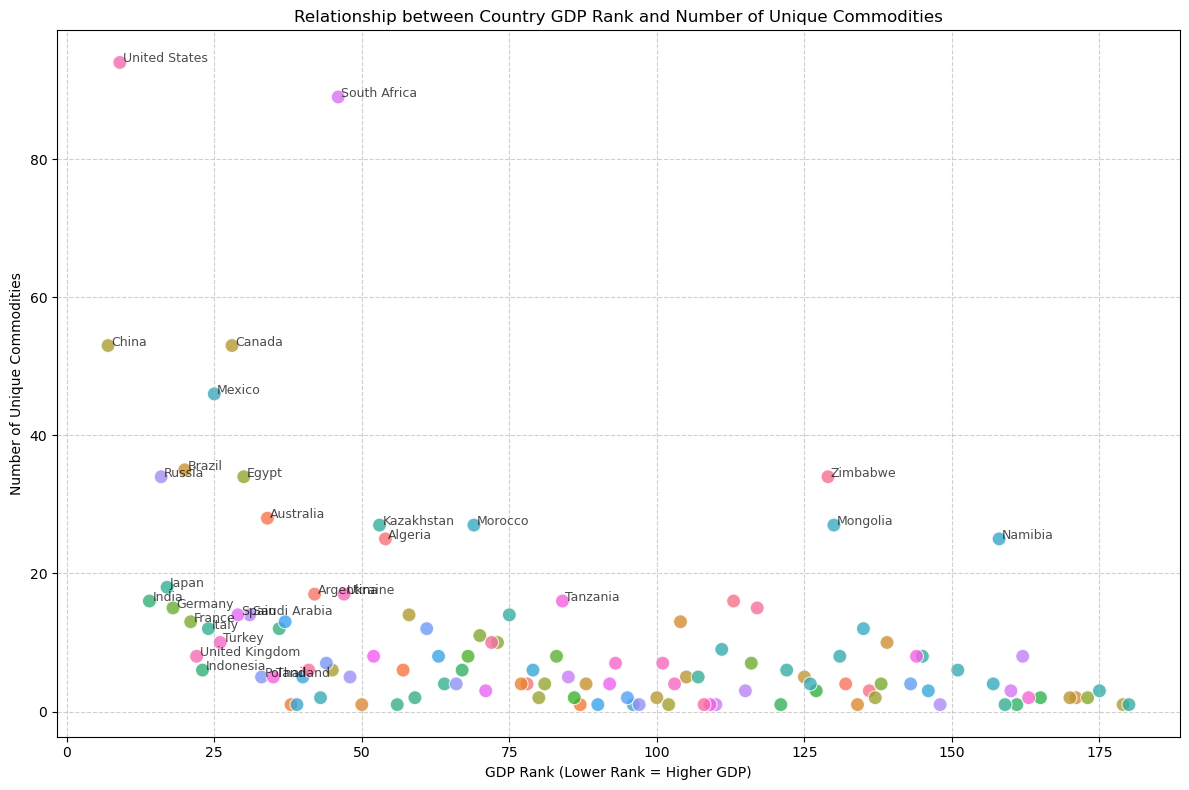


Visualization complete: Scatter plot showing GDP Rank vs. Number of Unique Commodities for each country.


In [4]:


# 3. Join the two datasets on the 'country' column
# Using an inner join to only include countries present in both datasets

df_combined = pd.merge(critical_mineral, gdp_ranked_2021 , on='country', how='inner')
commodity_count_per_country = df_combined.groupby('country')['commodity'].nunique().reset_index(name='num_unique_commodities')
df_combined = pd.merge(commodity_count_per_country, gdp_ranked_2021, on='country', how='inner')
if df_combined.empty:
    print("No common countries found between the deposit data and the ranked GDP data after joining.")
    print("Please check country naming consistency or consider a different join type if needed.")
    exit()

print("\nCombined data head (countries with both commodity counts and GDP ranks):")
print(df_combined.head())
print(f"\nNumber of countries in combined dataset: {len(df_combined)}")


 # 4. Visualize the data
plt.figure(figsize=(12, 8))
sns.scatterplot(
    data=df_combined,
    x='GDP_PPP_Rank',  
    y='num_unique_commodities',
    hue='country', # Use country for color to distinguish points
    s=100, # Size of points
    alpha=0.8, # Transparency
    legend=False # Hide individual country legend if too many points
)

# Add labels for some interesting points (e.g., top/bottom GDP ranks, or high/low commodity counts)
labeled_countries = []
# Top 5 by GDP Rank
labeled_countries.extend(df_combined.sort_values(by='GDP_PPP_Rank').head(20)['country'].tolist())
# Top 5 by Number of Commodities
labeled_countries.extend(df_combined.sort_values(by='num_unique_commodities', ascending=False).head(20)['country'].tolist())
# Remove duplicates
labeled_countries = list(set(labeled_countries))

for i, row in df_combined.iterrows():
    if row['country'] in labeled_countries:
        plt.text(row['GDP_PPP_Rank'] + 0.5, row['num_unique_commodities'], row['country'],
                 fontsize=9, alpha=0.7)

plt.title('Relationship between Country GDP Rank and Number of Unique Commodities')
plt.xlabel('GDP Rank (Lower Rank = Higher GDP)')
plt.ylabel('Number of Unique Commodities')
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.savefig('gdp_rank_vs_commodity_count_scatter.png')
plt.show()

print("\nVisualization complete: Scatter plot showing GDP Rank vs. Number of Unique Commodities for each country.")




In [5]:
# Create the GDP Rank Categories
def categorize_gdp_rank(rank):
    if rank < 25:
        return 'Rank < 25'
    elif 25 <= rank <= 75:
        return 'Rank 25-75'
    else:
        return 'Rank > 75'

df_combined['GDP_Rank_Category'] = df_combined['GDP_PPP_Rank'].apply(categorize_gdp_rank)

print("Categorizing countries by GDP Rank and showing commodity counts:\n")

# Display countries and their commodity counts for each category
gdp_categories = ['Rank < 25', 'Rank 25-75', 'Rank > 75']

for category in gdp_categories:
    category_df = df_combined[df_combined['GDP_Rank_Category'] == category].sort_values(by='num_unique_commodities', ascending=False)
    
    print(f"--- Category: {category} (Number of Countries: {len(category_df)}) ---")
    if not category_df.empty:
        # Display up to 10 countries directly for brevity, or all if the list is short
        if len(category_df) <= 20:
            print(category_df[['country', 'num_unique_commodities']].to_string(index=False))
        else:
            print(f"Showing top 10 countries by commodity count in this category:")
            print(category_df[['country', 'num_unique_commodities']].head(10).to_string(index=False))
            print(f"...and {len(category_df) - 10} more countries. (Full list not displayed for brevity)")
        
        # Save each category to a separate CSV for full data access if needed
        category_df[['country', 'num_unique_commodities', 'GDP_PPP_Rank']].to_csv(f'countries_gdp_category_{category.replace(" ", "_").replace("<", "lt_").replace(">", "gt_").replace("-", "_")}.csv', index=False)
        print(f"Full data for this category saved to 'countries_gdp_category_{category.replace(' ', '_').replace('<', 'lt_').replace('>', 'gt_').replace('-', '_')}.csv'")
    else:
        print("No countries in this category.")
    print("\n")
    

Categorizing countries by GDP Rank and showing commodity counts:

--- Category: Rank < 25 (Number of Countries: 11) ---
       country  num_unique_commodities
 United States                      94
         China                      53
        Brazil                      35
        Russia                      34
         Japan                      18
         India                      16
       Germany                      15
        France                      13
         Italy                      12
United Kingdom                       8
     Indonesia                       6
Full data for this category saved to 'countries_gdp_category_Rank_lt__25.csv'


--- Category: Rank 25-75 (Number of Countries: 42) ---
Showing top 10 countries by commodity count in this category:
     country  num_unique_commodities
South Africa                      89
      Canada                      53
      Mexico                      46
       Egypt                      34
   Australia                  

C:\Users\Faisal Askari\AppData\Local\Temp\ipykernel_12060\3701903071.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


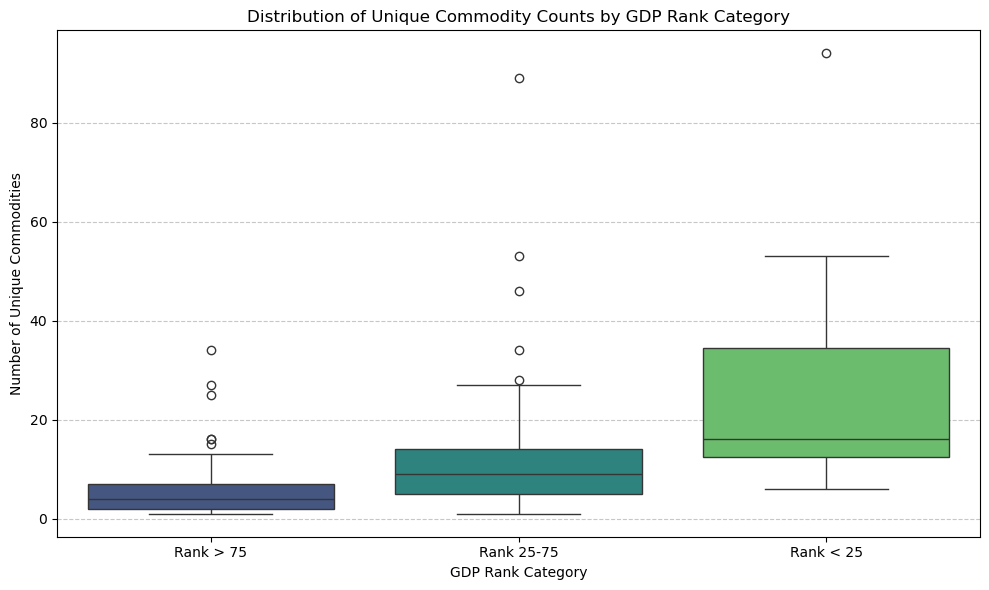


Visualization complete: Box plot showing the distribution of unique commodity counts across GDP Rank categories.


In [6]:
# Visualize the categorized data using a box plot
plt.figure(figsize=(10, 6))
sns.boxplot(
    data=df_combined,
    x='GDP_Rank_Category',
    y='num_unique_commodities',
    palette='viridis' # Choose a color palette
)

plt.title('Distribution of Unique Commodity Counts by GDP Rank Category')
plt.xlabel('GDP Rank Category')
plt.ylabel('Number of Unique Commodities')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig('commodity_count_by_gdp_category_boxplot.png')
plt.show()

print("\nVisualization complete: Box plot showing the distribution of unique commodity counts across GDP Rank categories.")


In [7]:
# Analysis by Category:
 # Rank < 25 (Highest GDP Countries):
 # Median: The median number of unique commodities in this category appears to be relatively low compared to the other categories.
 #Spread (IQR): The box is relatively narrow, suggesting that most of these highest GDP countries have a somewhat similar,
 #modest number of unique commodities.

 # Range & Outliers: There are significant outliers on the upper end (e.g., likely the United States and China,
# which were shown to have very high counts in the previous text output). 
# This indicates that while the typical high GDP country might not have an exceptionally high number of unique commodities, 
# a few dominant economies do possess a vast diversity of resources.

# Rank 25-75 (Mid-Range GDP Countries):
# Median: This category seems to have a higher median unique commodity count compared to the 'Rank < 25' group.
# Spread (IQR): The box appears wider than that of 'Rank < 25', indicating a greater variability in unique 
# commodity counts among these mid-range GDP countries.

# Range & Outliers: This category also contains countries with very high numbers of
# unique commodities (e.g., South Africa, Canada, Mexico). Many countries traditionally known for significant mineral resources 
# often fall into this GDP range.

# Rank > 75 (Lower GDP Countries):
# Median: The median unique commodity count in this category appears to be the lowest among the three groups.
# Spread (IQR): The spread seems moderate, but generally concentrated at lower commodity counts.
# Range & Outliers: While the majority of countries in this category have fewer unique commodities, 
# there are still some outliers with surprisingly high counts 
#(e.g., Zimbabwe, Mongolia, Namibia from the previous text output), suggesting that lower economic 
#standing does not necessarily preclude a country from having a diverse range of mineral resources.


Number of deposits per commodity group:
 commodity_group
Critical Minerals/Tech Metals    1524
Industrial Minerals               623
Precious Metals                   455
Other/Unclassified                413
Base Metals                       136
Energy Minerals                    10
Name: count, dtype: int64


C:\Users\Faisal Askari\AppData\Local\Temp\ipykernel_12060\276493862.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['commodity_group'] = df_cleaned['commodity'].apply(assign_commodity_group)


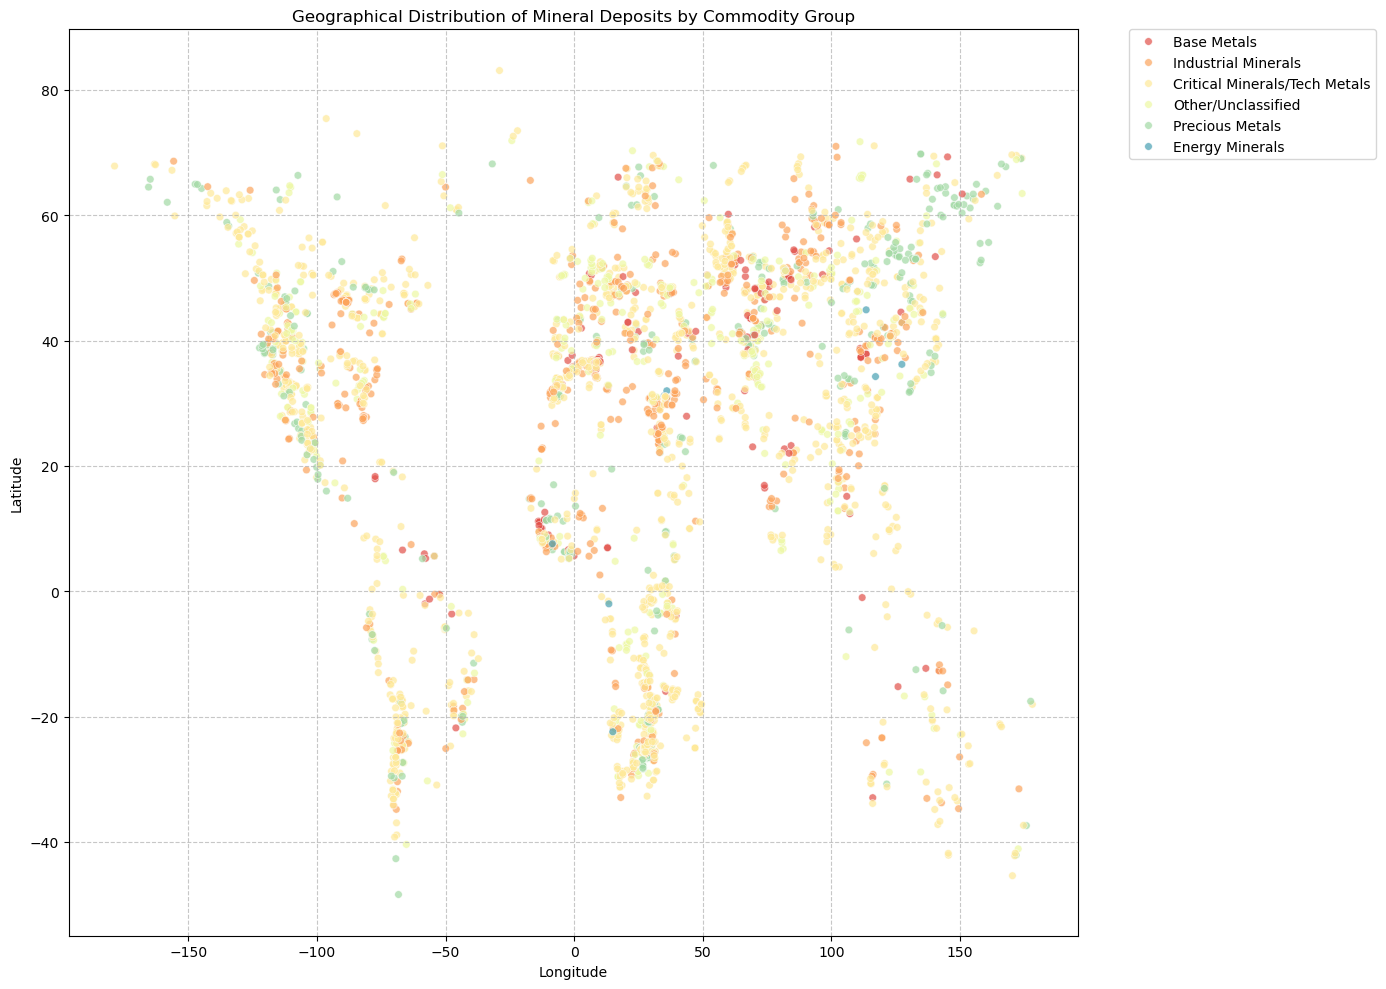

In [8]:
# Define a simple grouping strategy for demonstration based on common critical minerals and types
# This list can be expanded or refined based on specific critical mineral definitions (e.g., USGS list)
critical_minerals = [
    'RARE EARTH ELEMENTS', 'LITHIUM', 'COBALT', 'GRAPHITE', 'NICKEL',
    'PLATINUM GROUP ELEMENTS', 'VANADIUM', 'TITANIUM', 'TUNGSTEN', 'MANGANESE',
    'ANTIMONY', 'BERYLLIUM', 'BISMUTH', 'FLUORSPAR', 'GALLIUM', 'GERMANIUM',
    'HAFNIUM', 'INDIUM', 'MAGNESIUM', 'NIOBIUM', 'POTASH', 'RHENIUM',
    'STRONTIUM', 'TANTALUM', 'TELLURIUM', 'TIN', 'ZIRCONIUM', 'BAUXITE',
    'CHROMIUM', 'ZINC', 'COPPER' # Some commonly considered critical, or important for green tech
]

precious_metals = ['GOLD', 'SILVER', 'PLATINUM', 'PALLADIUM'] # Platinum also in PGEs, can refine
base_metals = ['COPPER', 'LEAD', 'ZINC', 'NICKEL', 'TIN', 'ALUMINUM'] # Overlap with critical_minerals is fine

energy_minerals = ['URANIUM', 'COAL', 'OIL', 'GAS'] # Not typically "critical minerals" for tech, but important resources

industrial_minerals = [
    'IRON', 'GYPSUM', 'SALT', 'SULFUR', 'PHOSPHATE', 'QUARTZ', 'CLAY', 'SAND',
    'LIMESTONE', 'DOLOMITE', 'TALC', 'ASBESTOS', 'BARITE', 'BORON', 'DIATOMITE',
    'FELDSPAR', 'PERLITE', 'VERMICULITE', 'ZEOLITES', 'GRAPHITE', 'SILICON' # Graphite overlap with critical
]

# Create a new column 'commodity_group'
def assign_commodity_group(commodity):
    commodity_upper = str(commodity).upper()
    if any(cm in commodity_upper for cm in critical_minerals):
        return 'Critical Minerals/Tech Metals'
    elif any(pm in commodity_upper for pm in precious_metals):
        return 'Precious Metals'
    elif any(bm in commodity_upper for bm in base_metals):
        return 'Base Metals'
    elif any(em in commodity_upper for em in energy_minerals):
        return 'Energy Minerals'
    elif any(im in commodity_upper for im in industrial_minerals):
        return 'Industrial Minerals'
    else:
        return 'Other/Unclassified'

df_cleaned['commodity_group'] = df_cleaned['commodity'].apply(assign_commodity_group)

# Count the number of deposits per group to see distribution
group_counts = df_cleaned['commodity_group'].value_counts()
print("\nNumber of deposits per commodity group:\n", group_counts)

# --- Step 2: Plot the Geographical Distribution by Group ---
plt.figure(figsize=(14, 10))
sns.scatterplot(
    data=df_cleaned,
    x='longitude',
    y='latitude',
    hue='commodity_group', # Use the new grouped column for color
    palette='Spectral', # A good palette for distinct categories
    s=30,
    alpha=0.7,
    legend='full'
)
plt.title('Geographical Distribution of Mineral Deposits by Commodity Group')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.tight_layout()
plt.savefig('deposits_by_commodity_group_geographical_distribution.png')
plt.show()




In [9]:


# Create a mapping function for commodity to group, with priority
def get_commodity_group(commodity_name):
    commodity_name = str(commodity_name).upper().strip() # Ensure consistency

    if commodity_name in critical_minerals:
        return 'Critical Minerals/Tech Metals'
    elif commodity_name in precious_metals:
        return 'Precious Metals'
    elif commodity_name in base_metals:
        return 'Base Metals'
    elif commodity_name in energy_minerals:
        return 'Energy Minerals'
    elif commodity_name in industrial_minerals:
        return 'Industrial Minerals'
    else:
        return 'Other/Unclassified'


# 3. Create `commodity_group` column in `df_deposit`
df_cleaned['commodity_group'] = df_cleaned['commodity'].apply(get_commodity_group)
print("Created 'commodity_group' column in df_cleaned.")
print("\nFirst 5 rows of df_deposit with new 'commodity_group' column:")
print(df_cleaned[['commodity', 'commodity_group']].head())
print("\nCounts of deposits per commodity group:")
print(df_cleaned['commodity_group'].value_counts())

# 4. Load other necessary DataFrames
# 4a. average_gdp-ppp.csv (avg_gdp_10_yrs)
try:
    df_avg_gdp = pd.read_csv('average_gdp-ppp.csv')
    df_avg_gdp['avg_gdp_10_yrs'] = pd.to_numeric(df_avg_gdp['avg_gdp_10_yrs'], errors='coerce')
    print("Loaded average_gdp-ppp.csv.")
except FileNotFoundError:
    print("Error: 'average_gdp-ppp.csv' not found. Please ensure the file is generated or uploaded.")
    exit()

# 4b. country_area_sqfeet.csv (area_sqft)
try:
    df_area_sqft = pd.read_csv('country_area_sqfeet.csv')
    df_area_sqft['area_sqft'] = pd.to_numeric(df_area_sqft['area_sqft'], errors='coerce')
    print("Loaded country_area_sqfeet.csv.")
except FileNotFoundError:
    print("Error: 'country_area_sqfeet.csv' not found. Please ensure the file is generated or uploaded.")
    exit()

# 5. Create `commodity_count_per_country`
commodity_count_per_country = df_cleaned.groupby('country')['commodity'].nunique().reset_index(name='num_unique_commodities')
print("\nCalculated num_unique_commodities per country.")

# 6. Merge DataFrames for Comprehensive Country Data
# Merge num_unique_commodities with avg_gdp_10_yrs
df_country_level_data = pd.merge(
    commodity_count_per_country,
    df_avg_gdp,
    on='country',
    how='inner'
)
print(f"Countries after merging unique commodity count and average GDP: {len(df_country_level_data)}")

# Merge with area_sqft
df_country_level_data = pd.merge(
    df_country_level_data,
    df_area_sqft,
    on='country',
    how='inner'
)
print(f"Countries in final country-level merged data: {len(df_country_level_data)}")

# Ensure numeric types and drop NaNs for correlation
df_country_level_data['num_unique_commodities'] = pd.to_numeric(df_country_level_data['num_unique_commodities'], errors='coerce')
df_country_level_data['avg_gdp_10_yrs'] = pd.to_numeric(df_country_level_data['avg_gdp_10_yrs'], errors='coerce')
df_country_level_data['area_sqft'] = pd.to_numeric(df_country_level_data['area_sqft'], errors='coerce')
df_country_level_data.dropna(subset=['num_unique_commodities', 'avg_gdp_10_yrs', 'area_sqft'], inplace=True)

if df_country_level_data.empty:
    print("No complete country data available after merging and dropping NaNs. Cannot proceed with correlation.")
    exit()

# 7. Analyze Relationships involving `commodity_group`

# 7a. Join df_deposit (with commodity_group) with df_country_level_data
# This links each deposit to its country's overall GDP, area, and unique commodity count.
df_combined_for_group_analysis = pd.merge(
    df_cleaned,
    df_country_level_data[['country', 'num_unique_commodities', 'avg_gdp_10_yrs', 'area_sqft']],
    on='country',
    how='inner'
)
print(f"\nTotal deposits in combined data for group analysis: {len(df_combined_for_group_analysis)}")

# 7b. Relationship 1: Avg GDP and Unique Commodities per Commodity Group
# Calculate the average avg_gdp_10_yrs and num_unique_commodities for countries
# that have deposits belonging to each commodity group.
# This requires grouping by commodity_group and then averaging the linked country-level metrics.
# Using .mean() will average the metrics across all deposits within that group.
# To get unique values for country-level metrics per group, we can use a different approach.
# Let's consider unique countries per commodity group for averaging GDP/unique commodities.

# Get unique countries per commodity group and their associated GDP/Commodity counts
df_group_summary = df_combined_for_group_analysis.groupby('commodity_group').agg(
    avg_gdp_10_yrs_mean=('avg_gdp_10_yrs', 'mean'),
    avg_num_unique_commodities_mean=('num_unique_commodities', 'mean'),
    num_countries=('country', 'nunique')
).reset_index()

print("\n--- Average GDP and Unique Commodities per Commodity Group (based on countries with deposits in that group) ---")
print(df_group_summary.to_string())

# 7c. Correlation between numerical variables (from df_country_level_data)
# This was already done in the previous step, but re-emphasizing its relevance.
correlation_matrix_numerical = df_country_level_data[['avg_gdp_10_yrs', 'num_unique_commodities', 'area_sqft']].corr()

print("\n--- Correlation Matrix between Average GDP (last 10 years), Unique Commodity Count, and Country Area (Numerical Variables) ---")
print(correlation_matrix_numerical.to_string())

# 7d. Country vs. Commodity Group
# Show which countries have deposits from which commodity groups
# Creating a pivot table for counts of deposits per country per commodity group
country_group_pivot = df_cleaned.pivot_table(
    index='country',
    columns='commodity_group',
    values='gid', # Using 'gid' to count deposits
    aggfunc='count',
    fill_value=0
)

# Adding total deposits per country for context
country_group_pivot['Total Deposits'] = country_group_pivot.sum(axis=1)
country_group_pivot = country_group_pivot.sort_values(by='Total Deposits', ascending=False)


print("\n--- Number of Deposits per Country per Commodity Group (Top 10 Countries by Total Deposits) ---")
print(country_group_pivot.head(50).to_string())

# Also, count how many countries have at least one deposit in each group
countries_per_group_count = df_cleaned.groupby('commodity_group')['country'].nunique().reset_index(name='num_countries_with_group_deposits')
print("\n--- Number of Countries with at Least One Deposit in Each Commodity Group ---")
print(countries_per_group_count.to_string())

Created 'commodity_group' column in df_cleaned.

First 5 rows of df_deposit with new 'commodity_group' column:
               commodity                commodity_group
0               Aluminum                    Base Metals
1                 Barite            Industrial Minerals
2  Beryllium-niobium,tin             Other/Unclassified
3               Chromium  Critical Minerals/Tech Metals
4                 Copper  Critical Minerals/Tech Metals

Counts of deposits per commodity group:
commodity_group
Other/Unclassified               1488
Critical Minerals/Tech Metals     729
Industrial Minerals               518
Precious Metals                   288
Base Metals                       134
Energy Minerals                     4
Name: count, dtype: int64
Error: 'average_gdp-ppp.csv' not found. Please ensure the file is generated or uploaded.
Error: 'country_area_sqfeet.csv' not found. Please ensure the file is generated or uploaded.

Calculated num_unique_commodities per country.
Countries af

C:\Users\Faisal Askari\AppData\Local\Temp\ipykernel_12060\1099389106.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['commodity_group'] = df_cleaned['commodity'].apply(get_commodity_group)
